In [2]:
import sys, traceback
import os
import ee
import geemap
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2
from datetime import date, timedelta, datetime

# Two adjacent cycles, same global temperature

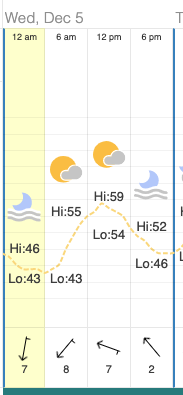

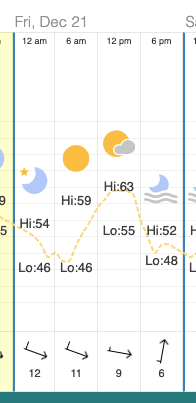

Time of capture: about 5PM <\br>
It appears that air temperature difference is ~1 °F (0.5 K)

In [4]:
def scaled(image):  # for LANDSAT8 hyperspectral
    opticalBands = image.select('SR_B.').multiply(0.0000275).add(-0.2)
    thermalBands = image.select('ST_B.*').multiply(0.00341802).add(149.0)
    emis = image.select('ST_EMIS').multiply(0.0001)  # estimated emissivity
    emsd = image.select('ST_EMSD').multiply(0.0001)  # uncertainty in emissivity estimation
    trad = image.select('ST_TRAD').multiply(0.001)  # thermal band converted to radiance
    qa = image.select('ST_QA').multiply(0.01)  # uncertainty in land surface temperature
    
    image =  image.addBands(opticalBands, None, True).addBands(thermalBands, None, True)
    image = image.addBands(emis, None, True).addBands(emsd, None, True)
    image = image.addBands(trad, None, True).addBands(qa, None, True)
    return image

In [5]:
min_, max_ = 0, 11
Map = geemap.Map(center=(29.7662, -95.2410), zoom=9)
img1 = scaled(ee.Image("LANDSAT/LC08/C02/T1_L2/LC08_025039_20181205"))
img2 = scaled(ee.Image("LANDSAT/LC08/C02/T1_L2/LC08_025039_20181221"))
left_layer = geemap.ee_tile_layer(img1.select(['SR_B4', 'SR_B3', 'SR_B2']), {'min': 0.0, 'max': 0.3,}, 'img1')
right_layer = geemap.ee_tile_layer(img2.select(['SR_B4', 'SR_B3', 'SR_B2']), {'min': 0.0, 'max': 0.3,}, 'img2')
Map.split_map(left_layer=left_layer, right_layer=right_layer)
Map.add_colorbar({'min': min_, 'max': max_}, label="RGB")
Map


Map(center=[29.7662, -95.241], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zo…

In [ ]:
min_, max_ = 0, 11
Map = geemap.Map(center=(29.7662, -95.2410), zoom=9)
img1 = scaled(ee.Image("LANDSAT/LC08/C02/T1_L2/LC08_025039_20181205"))
img2 = scaled(ee.Image("LANDSAT/LC08/C02/T1_L2/LC08_025039_20181221"))
Map.addLayer(img2.subtract(img1).select(['SR_B4', 'SR_B3', 'SR_B2']), {'min': -0.1, 'max': 0.1,}, 'img1')
Map


In [ ]:
min_, max_ = 6, 10
Map = geemap.Map(center=(29.7662, -95.2410), zoom=9)
img1 = scaled(ee.Image("LANDSAT/LC08/C02/T1_L2/LC08_025039_20181205"))
img2 = scaled(ee.Image("LANDSAT/LC08/C02/T1_L2/LC08_025039_20181221"))
left_layer = geemap.ee_tile_layer(img1.select(['ST_TRAD']), {'min': min_, 'max': max_}, 'img1')
right_layer = geemap.ee_tile_layer(img2.select(['ST_TRAD']), {'min': min_, 'max': max_}, 'img2')
Map.split_map(left_layer=left_layer, right_layer=right_layer)
Map.add_colorbar({'min': min_, 'max': max_}, label="Thermal Band Radiance (W/(m^2*sr*um)/ DN)")
Map

In [ ]:
# TOA Brightness Temperature vs. Surface Temperature of the same day
min_, max_ = 280, 300
Map = geemap.Map(center=(29.7662, -95.2410), zoom=9)
img1 = ee.Algorithms.Landsat.TOA(ee.Image("LANDSAT/LC08/C01/T1/LC08_025039_20181205"))
img2 = scaled(ee.Image("LANDSAT/LC08/C02/T1_L2/LC08_025039_20181205"))
left_layer = geemap.ee_tile_layer(img1.select(['B10']), {'min': min_, 'max': max_}, 'img1')
right_layer = geemap.ee_tile_layer(img2.select(['ST_B10']), {'min': min_, 'max': max_}, 'img2')
Map.split_map(left_layer=left_layer, right_layer=right_layer)
Map.add_colorbar({'min': min_, 'max': max_}, label="TOA Brightness Temperature vs. Surface Temperature, same day(K)")
Map

For same day, Surface Temperature looks like a sharpened version of TOA Brightness Temperature 

In [ ]:
min_, max_ = 280, 300
Map = geemap.Map(center=(29.7662, -95.2410), zoom=9)
img1 = scaled(ee.Image("LANDSAT/LC08/C02/T1_L2/LC08_025039_20181205"))
img2 = scaled(ee.Image("LANDSAT/LC08/C02/T1_L2/LC08_025039_20181221"))
left_layer = geemap.ee_tile_layer(img1.select(['ST_B10']), {'min': min_, 'max': max_}, 'img1')
right_layer = geemap.ee_tile_layer(img2.select(['ST_B10']), {'min': min_, 'max': max_}, 'img2')
Map.split_map(left_layer=left_layer, right_layer=right_layer)
Map.add_colorbar({'min': min_, 'max': max_}, label="Surface Temperature (K)")
Map

In [13]:
min_, max_ = -5, 5
Map = geemap.Map(center=(29.7662, -95.2410), zoom=9)
img1 = scaled(ee.Image("LANDSAT/LC08/C02/T1_L2/LC08_025039_20181205"))
img2 = scaled(ee.Image("LANDSAT/LC08/C02/T1_L2/LC08_025039_20181221"))
Map.addLayer(img1.subtract(img2).select(['ST_B10']), {'min': min_, 'max': max_})
Map.add_colorbar({'min': min_, 'max': max_}, label="Delta Surface Temperature (K)")
Map

Map(center=[29.7662, -95.241], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(chi…

In [ ]:
min_, max_ = -.5, .5
Map = geemap.Map(center=(29.7662, -95.2410), zoom=9)
img1 = scaled(ee.Image("LANDSAT/LC08/C02/T1_L2/LC08_025039_20181205"))
img2 = scaled(ee.Image("LANDSAT/LC08/C02/T1_L2/LC08_025039_20181221"))
Map.addLayer(img1.subtract(img2).select(['ST_TRAD']), {'min': min_, 'max': max_})
Map.add_colorbar({'min': min_, 'max': max_}, label="Delta Thermal Band Radiance (W/(m^2*sr*um)/ DN)")
Map

In [4]:
min_, max_ = -4, 4
Map = geemap.Map(center=(29.7662, -95.2410), zoom=9)
img1 = ee.Algorithms.Landsat.TOA(ee.Image("LANDSAT/LC08/C01/T1/LC08_025039_20181205"))
img2 = ee.Algorithms.Landsat.TOA(ee.Image("LANDSAT/LC08/C01/T1/LC08_025039_20181221"))
Map.addLayer(img1.subtract(img2).select(['B10']), {'min': min_, 'max': max_})
Map.add_colorbar({'min': min_, 'max': max_}, label="Delta TOA Brightness Temperature (K)")
Map

Map(center=[29.7662, -95.241], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(chi…

In [6]:
min_, max_ = -4, 4
Map = geemap.Map(center=(29.7662, -95.2410), zoom=9)
img1_rgb = scaled(ee.Image("LANDSAT/LC08/C02/T1_L2/LC08_025039_20181205"))
img1 = ee.Algorithms.Landsat.TOA(ee.Image("LANDSAT/LC08/C01/T1/LC08_025039_20181205"))
img2 = ee.Algorithms.Landsat.TOA(ee.Image("LANDSAT/LC08/C01/T1/LC08_025039_20181221"))
left_layer = geemap.ee_tile_layer(img1_rgb.select(['SR_B4', 'SR_B3', 'SR_B2']), {'min': 0.0, 'max': 0.3,}, 'img1')
right_layer = geemap.ee_tile_layer(img1.subtract(img2).select(['B10']), {'min': min_, 'max': max_})
Map.split_map(left_layer=left_layer, right_layer=right_layer)
Map.add_colorbar({'min': min_, 'max': max_}, label="Delta TOA Brightness Temperature (K)")
Map


Map(center=[29.7662, -95.241], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zo…

In [ ]:
min_, max_ = -4, 4
Map = geemap.Map(center=(29.7662, -95.2410), zoom=9)
img2_rgb = scaled(ee.Image("LANDSAT/LC08/C02/T1_L2/LC08_025039_20181221"))
img1 = ee.Algorithms.Landsat.TOA(ee.Image("LANDSAT/LC08/C01/T1/LC08_025039_20181205"))
img2 = ee.Algorithms.Landsat.TOA(ee.Image("LANDSAT/LC08/C01/T1/LC08_025039_20181221"))
left_layer = geemap.ee_tile_layer(img2_rgb.select(['SR_B4', 'SR_B3', 'SR_B2']), {'min': 0.0, 'max': 0.3,}, 'img1')
right_layer = geemap.ee_tile_layer(img1.subtract(img2).select(['B10']), {'min': min_, 'max': max_})
Map.split_map(left_layer=right_layer, right_layer=left_layer)
Map.add_colorbar({'min': min_, 'max': max_}, label="Delta TOA Brightness Temperature (K)")
Map


Locations where temperature is significantly cooler at Dec 21. Construction ceased near Xmas?

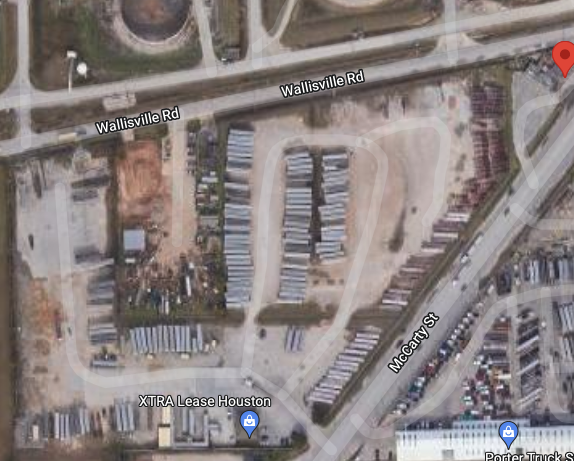

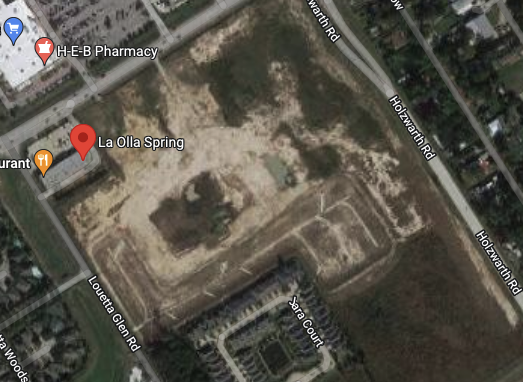

# Two non-adjacent cycles, drastically different temperature

Now with global temperature difference = (88 - 55) = 33 °F = 18 K

In [7]:
min_, max_ = 0, 11
Map = geemap.Map(center=(29.7662, -95.2410), zoom=9)
img1 = scaled(ee.Image("LANDSAT/LC08/C02/T1_L2/LC08_025039_20180916"))
img2 = scaled(ee.Image("LANDSAT/LC08/C02/T1_L2/LC08_025039_20181205"))
left_layer = geemap.ee_tile_layer(img1.select(['SR_B4', 'SR_B3', 'SR_B2']), {'min': 0.0, 'max': 0.3,}, 'img1')
right_layer = geemap.ee_tile_layer(img2.select(['SR_B4', 'SR_B3', 'SR_B2']), {'min': 0.0, 'max': 0.3,}, 'img2')
Map.split_map(left_layer=left_layer, right_layer=right_layer)
Map.add_colorbar({'min': min_, 'max': max_}, label="RGB")
Map


Map(center=[29.7662, -95.241], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zo…

In [8]:
min_, max_ = 8, 18
Map = geemap.Map(center=(29.7662, -95.2410), zoom=9)
img1 = ee.Algorithms.Landsat.TOA(ee.Image("LANDSAT/LC08/C01/T1/LC08_025039_20180916"))
img2 = ee.Algorithms.Landsat.TOA(ee.Image("LANDSAT/LC08/C01/T1/LC08_025039_20181205"))
Map.addLayer(img1.subtract(img2).select(['B10']), {'min': min_, 'max': max_})
Map.add_colorbar({'min': min_, 'max': max_}, label="Delta TOA Brightness Temperature (K)")
Map

Map(center=[29.7662, -95.241], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(chi…

Mean ~= 13 K, smaller than global air temp difference (18K)

# Two non-adjacent cycles, modestly different temperature

Now with global temperature difference = (39 - 55) = -16 °F = -9 K

In [9]:
min_, max_ =  -12, -5
Map = geemap.Map(center=(29.7662, -95.2410), zoom=9)
img1 = ee.Algorithms.Landsat.TOA(ee.Image("LANDSAT/LC08/C01/T1/LC08_025039_20180103"))
img2 = ee.Algorithms.Landsat.TOA(ee.Image("LANDSAT/LC08/C01/T1/LC08_025039_20181205"))
Map.addLayer(img1.subtract(img2).select(['B10']), {'min': min_, 'max': max_})
Map.add_colorbar({'min': min_, 'max': max_}, label="Delta TOA Brightness Temperature (K)")
Map

Map(center=[29.7662, -95.241], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(chi…

Mean ~= -8 K, similar global air temp difference (-9K), despite being 1 year apart

# Same day, normalized TOA BT

In [5]:
min_, max_ = -5, 10
Map = geemap.Map(center=(29.7662, -95.2410), zoom=9)
img1 = ee.Algorithms.Landsat.TOA(ee.Image("LANDSAT/LC08/C01/T1/LC08_025039_20181205"))
left_layer = geemap.ee_tile_layer(img1.select(['B4', 'B3', 'B2']), {'min': 0.0, 'max': 0.3,}, 'img1')
right_layer = geemap.ee_tile_layer(img1.select(['B10']).subtract(284.36), {'min': min_, 'max': max_}, 'img1')
Map.split_map(left_layer=right_layer, right_layer=left_layer)
Map.add_colorbar({'min': min_, 'max': max_}, label="Difference in TOA Brightness Temperature (K)")
Map

Map(center=[29.7662, -95.241], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zo…

In [6]:
min_, max_ = -5, 10
Map = geemap.Map(center=(29.7662, -95.2410), zoom=9)
img1 = ee.Algorithms.Landsat.TOA(ee.Image("LANDSAT/LC08/C01/T1/LC08_025039_20181205"))
left_layer = geemap.ee_tile_layer(img1.select(['B4', 'B3', 'B2']), {'min': 0.0, 'max': 0.3,}, 'img1')
Map.addLayer(img1.select(['B10']).subtract(284.36), {'min': min_, 'max': max_}, 'img1')
Map.add_colorbar({'min': min_, 'max': max_}, label="Normalized TOA Brightness Temperature (K)")
Map

Map(center=[29.7662, -95.241], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(chi…

The city center of Houston is about 8 K (or 8 C) hotter than surrounding, when not accounting for emissivity. </br>
When emissivity is accounted, the temperature difference is even greater, since emissivity of concrete is lower than vegetation. </br>
Some noticeable heat clusters: NGR stadium, Colonial Pipeline (a gas company), Houston scrap metals (giant factory or metal dealer), American Warehouses, Triple-S Steel Supply Co. </br>
Downtown is rather cool, likely due to shadows. </br></br>
Strangely, many negative clusters are also factory sites. It is possible that they have low emissivity (e.g. metal construction)

In [ ]:
# landsat_stats = geemap.image_stats(img1, scale=30)
# landsat_stats.getInfo()

# Is there a temporal consistency in gradient maps?

In [7]:
min_, max_ = -5, 10
Map = geemap.Map(center=(29.7662, -95.2410), zoom=9)
img1 = ee.Algorithms.Landsat.TOA(ee.Image("LANDSAT/LC08/C01/T1/LC08_025039_20180103"))
img2 = ee.Algorithms.Landsat.TOA(ee.Image("LANDSAT/LC08/C01/T1/LC08_025039_20181205"))

left_layer = geemap.ee_tile_layer(img1.select(['B10']).subtract(277.44 - 1), {'min': min_, 'max': max_}, 'img1')
right_layer = geemap.ee_tile_layer(img2.select(['B10']).subtract(284.36), {'min': min_, 'max': max_}, 'img2')
Map.split_map(left_layer=left_layer, right_layer=right_layer)
Map.add_colorbar({'min': min_, 'max': max_}, label="Gradient TOA Brightness Temperature (K)")
Map

Map(center=[29.7662, -95.241], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zo…

In [ ]:
# landsat_stats = geemap.image_stats(img1, scale=30)
# landsat_stats.getInfo()

In [11]:
min_, max_ = -5, 5
img0 = ee.Algorithms.Landsat.TOA(ee.Image("LANDSAT/LC08/C01/T1/LC08_025039_20180103"))
img1 = ee.Algorithms.Landsat.TOA(ee.Image("LANDSAT/LC08/C01/T1/LC08_025039_20181205"))
Map = geemap.Map(center=(29.7662, -95.2410), zoom=9)
Map.addLayer(img0.subtract(img1).subtract(277.44 - 1 - 284.36).select(['B10']), {'min': min_, 'max': max_}, 'img1')
Map.add_colorbar({'min': min_, 'max': max_}, label="Delta Gradient TOA Brightness Temperature (K)")
Map

Map(center=[29.7662, -95.241], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(chi…

In [12]:
min_, max_ = -4, 4
Map = geemap.Map(center=(29.7662, -95.2410), zoom=9)
img0 = ee.Algorithms.Landsat.TOA(ee.Image("LANDSAT/LC08/C01/T1/LC08_025039_20180103"))
img1 = ee.Algorithms.Landsat.TOA(ee.Image("LANDSAT/LC08/C01/T1/LC08_025039_20181205"))
img2 = ee.Algorithms.Landsat.TOA(ee.Image("LANDSAT/LC08/C01/T1/LC08_025039_20181221"))
Map.addLayer(img1.subtract(img2).select(['B10']), {'min': min_, 'max': max_}, 'short time interval')
Map.addLayer(img1.subtract(img0).subtract(-277.44 + 1 + 284.36).select(['B10']), {'min': min_, 'max': max_}, 'long time interval')
Map.add_colorbar({'min': min_, 'max': max_}, label="Delta TOA Brightness Temperature (K)")
Map

Map(center=[29.7662, -95.241], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(chi…

Bulidings are consistent! Vegetation is not, likely due to annual cycle. 

# Is there a connection between delta gradient BT and Landcover type?

In [7]:
min_, max_ = -4, 4
Map = geemap.Map(center=(29.7662, -95.2410), zoom=9)
img1 = ee.Algorithms.Landsat.TOA(ee.Image("LANDSAT/LC08/C01/T1/LC08_025039_20181205"))
img2 = ee.Algorithms.Landsat.TOA(ee.Image("LANDSAT/LC08/C01/T1/LC08_025039_20181221"))
dataset = ee.ImageCollection('USGS/NLCD_RELEASES/2019_REL/NLCD')
nlcd2019 = dataset.filter(ee.Filter.eq('system:index', '2019')).first()
landcover_2019 = nlcd2019.select('landcover')

left_layer = geemap.ee_tile_layer(img1.subtract(img2).select(['B10']), {'min': min_, 'max': max_})
right_layer = geemap.ee_tile_layer(landcover_2019, {}, 'NLCD 2019')
Map.add_colorbar({'min': min_, 'max': max_}, label="Delta TOA Brightness Temperature (K)")
Map.split_map(left_layer=left_layer, right_layer=right_layer)
Map

Map(center=[29.7662, -95.241], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zo…

In [ ]:
# min_, max_ = 280, 300
# Map = geemap.Map(center=(29.7662, -95.2410), zoom=9)
# img1 = ee.Algorithms.Landsat.TOA(ee.Image("LANDSAT/LC08/C01/T1/LC08_025039_20181205"))
# img2 = ee.Algorithms.Landsat.TOA(ee.Image("LANDSAT/LC08/C01/T1/LC08_025039_20181221"))
# dataset = ee.ImageCollection('USGS/NLCD_RELEASES/2019_REL/NLCD')
# nlcd2019 = dataset.filter(ee.Filter.eq('system:index', '2019')).first()
# landcover_2019 = nlcd2019.select('landcover')

# left_layer = geemap.ee_tile_layer(img1.select(['B10']), {'min': min_, 'max': max_})
# right_layer = geemap.ee_tile_layer(landcover_2019, {}, 'NLCD 2019')
# Map.add_colorbar({'min': min_, 'max': max_}, label="Delta TOA Brightness Temperature (K)")
# Map.split_map(left_layer=left_layer, right_layer=right_layer)
# Map

# Does ASTER GED emissivity map change over time

In [ ]:
Map = geemap.Map(center=(29.7662, -95.2410), zoom=9)
img1 = scaled(ee.Image("LANDSAT/LC08/C02/T1_L2/LC08_025039_20181205"))
img2 = scaled(ee.Image("LANDSAT/LC08/C02/T1_L2/LC08_025039_20190514"))
min_, max_ = 0.85, 1.0
left_layer = geemap.ee_tile_layer(img1.select(['ST_EMIS']), {'min': min_, 'max': max_}, 'emissivity')
right_layer = geemap.ee_tile_layer(img2.select(['ST_EMIS']), {'min': min_, 'max': max_}, 'emissivity2')
Map = geemap.Map(center=(29.7662, -95.2410), zoom=14)
Map.split_map(left_layer=left_layer, right_layer=right_layer)
Map.add_colorbar({'min': min_, 'max': max_}, label="Estimated Emissivity")
Map

In [ ]:
Map = geemap.Map(center=(29.7662, -95.2410), zoom=9)
img1 = scaled(ee.Image("LANDSAT/LC08/C02/T1_L2/LC08_025039_20181205"))
img2 = scaled(ee.Image("LANDSAT/LC08/C02/T1_L2/LC08_025039_20181221"))
min_, max_ = -.01, .01
Map = geemap.Map(center=(29.7662, -95.2410), zoom=14)
Map.addLayer(img2.subtract(img1).select(['ST_EMIS']), {'min': min_, 'max': max_}, 'emissivity')
Map.add_colorbar({'min': min_, 'max': max_}, label="Estimated Emissivity")
Map

In [ ]:
Map = geemap.Map(center=(29.7662, -95.2410), zoom=9)
img1 = scaled(ee.Image("LANDSAT/LC08/C02/T1_L2/LC08_025039_20181205"))
img2 = scaled(ee.Image("LANDSAT/LC08/C02/T1_L2/LC08_025039_20190514"))
min_, max_ = 0.85, 1.0
left_layer = geemap.ee_tile_layer(img1.select(['SR_B4', 'SR_B3', 'SR_B2']), {'min': 0.0, 'max': 0.3,}, 'img1')
right_layer = geemap.ee_tile_layer(img2.select(['SR_B4', 'SR_B3', 'SR_B2']), {'min': 0.0, 'max': 0.3,}, 'img1')
Map = geemap.Map(center=(29.7662, -95.2410), zoom=14)
Map.split_map(left_layer=left_layer, right_layer=right_layer)
Map.add_colorbar({'min': min_, 'max': max_}, label="Estimated Emissivity")
Map

ASTER GED Emissivity is effected by cloud. It does a fairly good job at accounting for changes in water body. </br>
ASTER GED seems to carve out developed regions and tend to not update those areas. 